In [18]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import glob
import cv2
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import *

In [ ]:
# https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset/data

In [19]:
# Loading imgs 
imgs=glob.glob('/kaggle/input/english-handwritten-characters-dataset/Img/*')

# Loading csv file
df = pd.read_csv("/kaggle/input/english-handwritten-characters-dataset/english.csv")
df.head(6)

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
5,Img/img001-006.png,0


In [20]:
# Sorting image paths
new_imgs = sorted(imgs)

# Listing labels
labels = df['label'].tolist()

# Reading images and preprocessing
new_data = []
for i in new_imgs:
    # Read image
    img = cv2.imread(i, 1)
    # Resize image
    img = cv2.resize(img, (64, 64))
    # Append to new_data list
    new_data.append(img)
# Convert new_data to numpy array
new_data = np.array(new_data)

# Convert labels to numpy array
labels = np.array(labels)

# Encode labels
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [116]:
# build
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
#         tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
#     tf.keras.layers.MaxPool2D(2,2),
    
#     tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dense(2048,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='sigmoid'),
    tf.keras.layers.Dense(62,activation='softmax')
])
# compile
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# fit
epoch = 42
history = model.fit(train_images,train_labels,epochs=epoch,validation_split = 0.2)

Epoch 1/42
 4/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.0085 - loss: 4.4162

W0000 00:00:1714339293.008309     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0114 - loss: 4.2564

W0000 00:00:1714339296.812352     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714339297.418781     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.0114 - loss: 4.2556 - val_accuracy: 0.0238 - val_loss: 4.0987
Epoch 2/42


W0000 00:00:1714339297.996226     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.0431 - loss: 3.9323 - val_accuracy: 0.0934 - val_loss: 3.4039
Epoch 3/42
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.1296 - loss: 3.2205 - val_accuracy: 0.1777 - val_loss: 2.9198
Epoch 4/42
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2251 - loss: 2.7205 - val_accuracy: 0.2051 - val_loss: 2.7055
Epoch 5/42
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2573 - loss: 2.4127 - val_accuracy: 0.2546 - val_loss: 2.4959
Epoch 6/42
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3445 - loss: 2.1749 - val_accuracy: 0.3132 - val_loss: 2.3879
Epoch 7/42
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4028 - loss: 1.9455 - val_accuracy: 0.3736 - val_loss: 2.1400
Epoch 8/42
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5011 - loss: 1.5915 - val_accuracy: 0.3993 - val_loss: 2.0555
Epoch 9/42
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5464 - loss: 1.5021 - val_accuracy: 0.4267 - val_loss: 1.

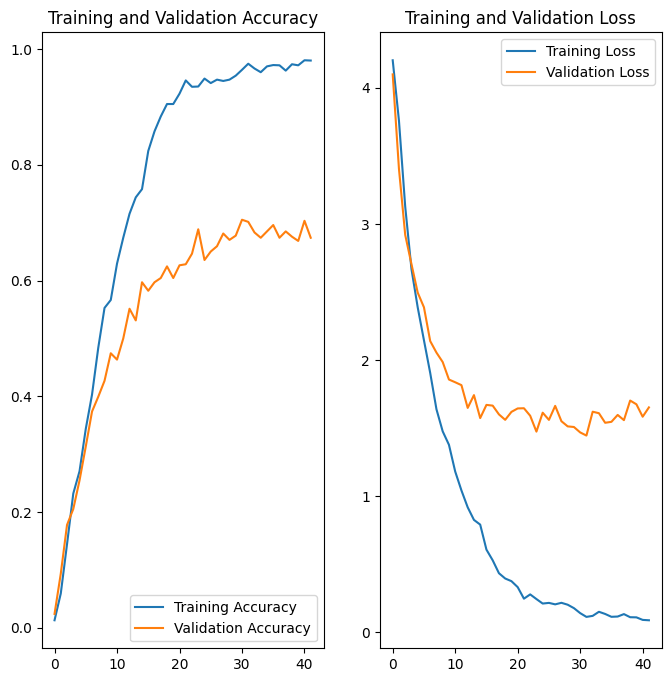

In [118]:
# training visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [119]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)

y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 - 1s - 36ms/step - accuracy: 0.7009 - loss: 1.4190


W0000 00:00:1714339427.863794     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test accuracy: 0.7008797526359558
20/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

W0000 00:00:1714339428.453976     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

W0000 00:00:1714339429.086294     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.7008797653958945
Precision: 0.7467815432531982
Recall: 0.7008797653958945
F1 Score: 0.7032197159215964
Confusion Matrix:
[[ 5  0  0 ...  0  0  0]
 [ 0  5  0 ...  1  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  6]]


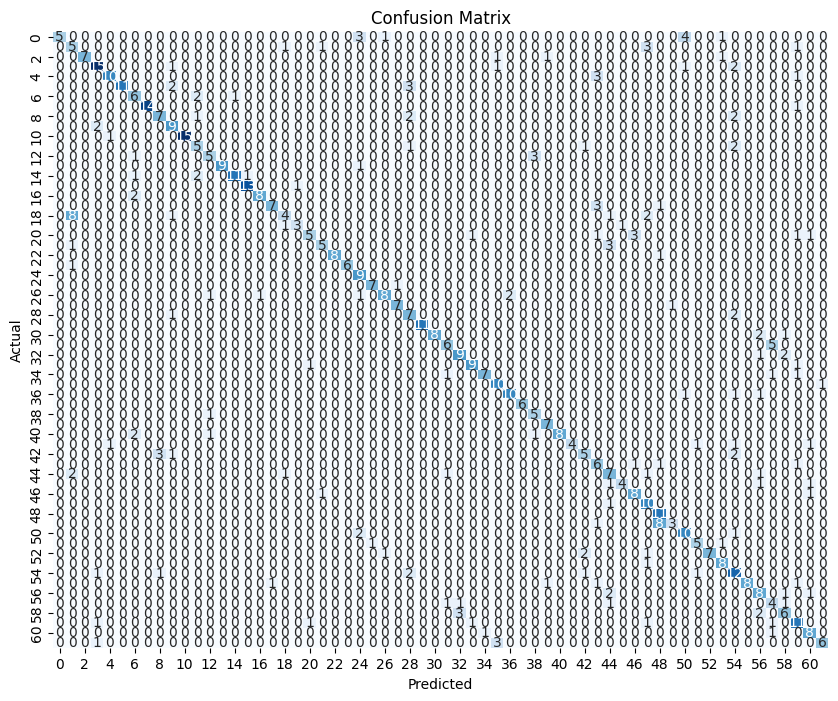

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


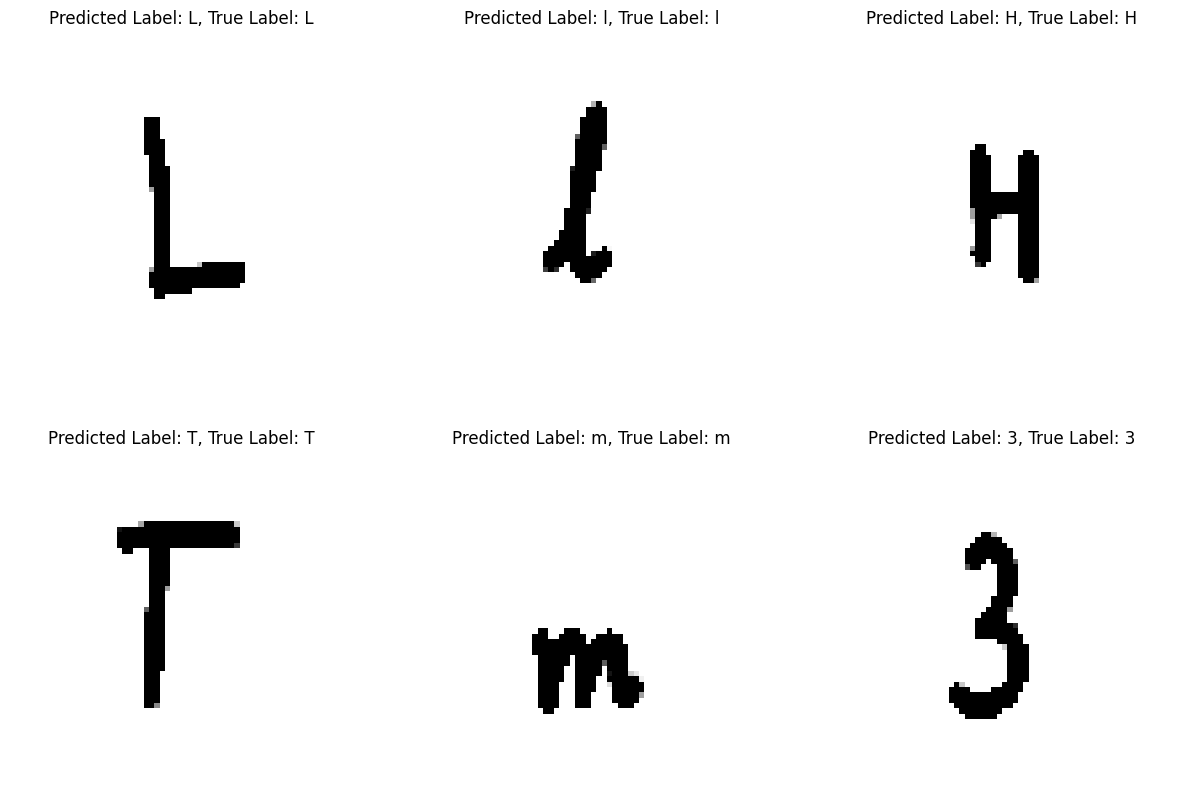

In [122]:
import random

# Randomly select 6 indices from the test set
random_indices = random.sample(range(len(test_images)), 6)

# Predict probabilities for each class for the randomly selected images
y_pred_probs = model.predict(test_images[random_indices])

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Decode the predicted labels
y_pred_labels_decoded = Encoder.inverse_transform(y_pred_labels)

# Decode the true labels
y_true_labels_decoded = Encoder.inverse_transform(test_labels[random_indices])

# Display the randomly selected test images along with their predicted and true labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[idx])
    plt.title(f'Predicted Label: {y_pred_labels_decoded[i]}, True Label: {y_true_labels_decoded[i]}')
    plt.axis('off')
plt.show()

In [163]:
test_imgs = cv2.imread("/kaggle/input/testing-files/20240429_025955(1).jpg")
test_img = cv2.resize(test_imgs, (64, 64))
test_img.shape

(64, 64, 3)

In [164]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 64, 64, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


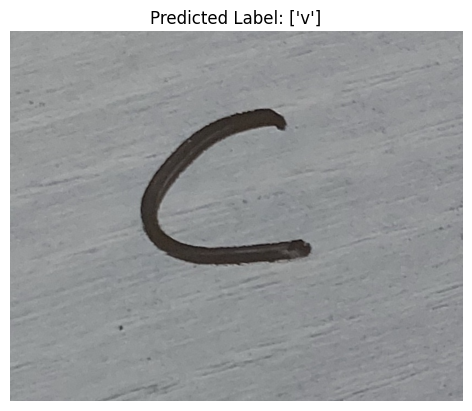

In [165]:
# Predict probabilities for each class for the randomly selected images
y_pred_probs = model.predict(test_img)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Decode the predicted labels
y_pred_labels_decoded = Encoder.inverse_transform(y_pred_labels)

# # Decode the true labels
# y_true_labels_decoded = Encoder.inverse_transform(test_labels[random_indices])

# # Display the randomly selected test images along with their predicted and true labels
# plt.figure(figsize=(15, 10))
# for i, idx in enumerate(1):
#     plt.subplot(1, 1, i+1)
plt.imshow(test_imgs)
plt.title(f'Predicted Label: {y_pred_labels_decoded}')
plt.axis('off')
plt.show()

In [ ]:
# The above character is classified as 'v' instead of 'c'. 
# The reason is because the model havent seen a singleimage with varing background color. 
# So the model has overfitted with white background as a feature. 
# We can visualize it in the training history itself. 
# The model has a huge gap between training and validation curve.